# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import pandas as pd
df = pd.read_csv('countries_of_the_world.csv')
df.set_index("Country")
df.pop("Region")
df.dropna()

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


Como bien vemos en el dataframe que acabamos de crear, obtenemos un total de 179 paises(filas) y 19 variables(columnas) asociadas a esos paises. Hemos eliminado la columna Region con df.pop("Region") y todas las filas donde faltaba al menos un elemento con df.dropna()

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
df = pd.read_csv('countries_of_the_world.csv')
df.iloc[:, [0,8,9,10,16,17,18,19]]

,Country,GDP ($ per capita),Literacy (%),Phones (per 1000),Deathrate,Agriculture,Industry,Service
0,Afghanistan,700.0,36.0,3.2,20.34,0.380,0.240,0.380
1,Albania,4500.0,86.5,71.2,5.22,0.232,0.188,0.579
2,Algeria,6000.0,70.0,78.1,4.61,0.101,0.600,0.298
3,American Samoa,8000.0,97.0,259.5,3.27,NaN,NaN,NaN
4,Andorra,19000.0,100.0,497.2,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
222,West Bank,800.0,NaN,145.2,3.92,0.090,0.280,0.630
223,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,0.400
224,Yemen,800.0,50.2,37.2,8.30,0.135,0.472,0.393
225,Zambia,800.0,80.6,8.2,19.93,0.220,0.290,0.489


In [4]:
media = df["GDP ($ per capita)"].mean()
mediana = df["GDP ($ per capita)"].median()
moda = df["GDP ($ per capita)"].mode()
std = df["GDP ($ per capita)"].std(ddof=0)
rango = df["GDP ($ per capita)"].max() - df["GDP ($ per capita)"].min()
print("""
-GDP ($ per capita)-
    Media: %d
    Mediana: %d
    Moda: %d
    Desviación típica: %d
    Rango: %d
""" % (media,mediana,moda,std,rango))


-GDP ($ per capita)-
    Media: 9689
    Mediana: 5550
    Moda: 800
    Desviación típica: 10026
    Rango: 54600



In [5]:
media = df["Literacy (%)"].mean()
mediana = df["Literacy (%)"].median()
moda = df["Literacy (%)"].mode()
std = df["Literacy (%)"].std(ddof=0)
rango = df["Literacy (%)"].max() - df["Literacy (%)"].min()
print("""
-Literacy-
    Media: %d
    Mediana: %d
    Moda: %d
    Desviación típica: %d
    Rango: %d
""" % (media,mediana,moda,std,rango))


-Literacy-
    Media: 82
    Mediana: 92
    Moda: 99
    Desviación típica: 19
    Rango: 82



In [6]:
media = df["Phones (per 1000)"].mean()
mediana = df["Phones (per 1000)"].median()
std = df["Phones (per 1000)"].std(ddof=0)
rango = df["Phones (per 1000)"].max() - df["Phones (per 1000)"].min()
print("""
-Phones (per 1000)-
    Media: %d
    Mediana: %d
    Desviación típica: %d
    Rango: %d
""" % (media,mediana,std,rango))


-Phones (per 1000)-
    Media: 236
    Mediana: 176
    Desviación típica: 227
    Rango: 1035



In [7]:
media = df["Deathrate"].mean()
mediana = df["Deathrate"].median()
std = df["Deathrate"].std(ddof=0)
rango = df["Deathrate"].max() - df["Deathrate"].min()
print("""
-Deathrate-
    Media: %d
    Mediana: %d
    Desviación típica: %d
    Rango: %d
""" % (media,mediana,std,rango))


-Deathrate-
    Media: 9
    Mediana: 7
    Desviación típica: 4
    Rango: 27



In [8]:
media = df["Agriculture"].mean()
mediana = df["Agriculture"].median()
std = df["Agriculture"].std(ddof=0)
rango = df["Agriculture"].max() - df["Agriculture"].min()
print("""
-Agriculture-
    Media: %f
    Mediana: %f
    Desviación típica: %f
    Rango: %f
""" % (media,mediana,std,rango))


-Agriculture-
    Media: 0.150844
    Mediana: 0.099000
    Desviación típica: 0.146451
    Rango: 0.769000



In [9]:
media = df["Industry"].mean()
mediana = df["Industry"].median()
std = df["Industry"].std(ddof=0)
rango = df["Industry"].max() - df["Industry"].min()
print("""
-Industry-
    Media: %f
    Mediana: %f
    Desviación típica: %f
    Rango: %f
""" % (media,mediana,std,rango))


-Industry-
    Media: 0.282711
    Mediana: 0.272000
    Desviación típica: 0.137944
    Rango: 0.886000



In [10]:
media = df["Service"].mean()
mediana = df["Service"].median()
std = df["Service"].std(ddof=0)
rango = df["Service"].max() - df["Service"].min()
print("""
-Service-
    Media: %f
    Mediana: %f
    Desviación típica: %f
    Rango: %f
""" % (media,mediana,std,rango))


-Service-
    Media: 0.565283
    Mediana: 0.571000
    Desviación típica: 0.165449
    Rango: 0.892000



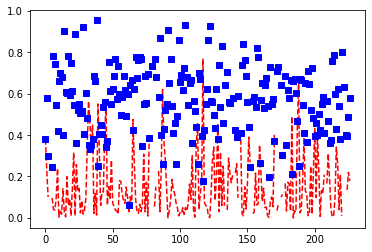

In [11]:
'''Diagrama de dispersion'''
import matplotlib.pyplot as plt
plt.plot(df["Agriculture"], 'r--', df["Service"], 'bs')
plt.show()


En este diagrama de dispersión podemos comparar los valores que tomas las dos variables (Agriculture y Service)

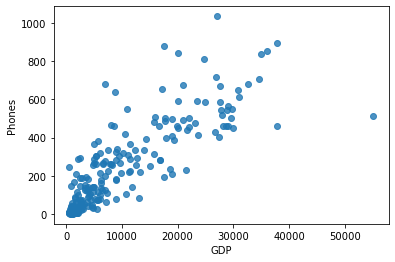

In [12]:
'''Coeficiente de correlación'''
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(df["GDP ($ per capita)"], df["Phones (per 1000)"], alpha= 0.8)
ax.set_xlabel('GDP')
ax.set_ylabel('Phones');

El diagrama de dispersión parece indicar una relación lineal positiva entre ambas variables (GDP y phones)

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [37]:
#tenemos que agrupar en funcion de X, y despues lo utilizamos para los clusters
#ya que en nuestro archivo no manejaremos numeros negativos hemos decidido normalizar(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.read_csv('countries_of_the_world.csv')

transformed_df = scaler.fit_transform(df.iloc[:, 2:20])

transformed_df = pd.DataFrame(transformed_df)
df.pop("Country")
df.pop("Region")
transformed_df.columns = df.columns
print(transformed_df)

     Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0      0.023631        0.037920                    0.002950   
1      0.002720        0.001683                    0.007658   
2      0.025056        0.139485                    0.000848   
3      0.000039        0.000012                    0.017847   
4      0.000049        0.000027                    0.009348   
..          ...             ...                         ...   
222    0.001867        0.000343                    0.025806   
223    0.000202        0.015578                    0.000061   
224    0.016324        0.030920                    0.002495   
225    0.008748        0.044076                    0.000940   
226    0.009308        0.022874                    0.001924   

     Coastline (coast/area ratio)  Net migration  \
0                        0.000000       1.000000   
1                        0.001447       0.364586   
2                        0.000046       0.467650   
3                        0.066949  

In [48]:
#eliminamos los elemntos NaN, que nos provocarian error al encontrar el numero optimo de clusters
transformed_df = transformed_df.dropna()
print(transformed_df)

     Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0      0.023631        0.037920                    0.002950   
1      0.002720        0.001683                    0.007658   
2      0.025056        0.139485                    0.000848   
6      0.000005        0.000006                    0.008118   
7      0.000047        0.000026                    0.009587   
..          ...             ...                         ...   
218    0.019577        0.053414                    0.001733   
219    0.064230        0.019300                    0.015739   
224    0.016324        0.030920                    0.002495   
225    0.008748        0.044076                    0.000940   
226    0.009308        0.022874                    0.001924   

     Coastline (coast/area ratio)  Net migration  \
0                        0.000000       1.000000   
1                        0.001447       0.364586   
2                        0.000046       0.467650   
6                        0.068684  

Es necesario escalar ya que nuestro vector tiene valores extremadamente altos(se puede observar esto en el grafico del coeficiente de correlacion). Escalando esos valores nuestro algoritmo opera con valores cercanos.

Podemos confirmar la distribución de las características con el método describe, que ofrece información estadística del dataframe:

In [35]:
transformed_df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227.000000,227.000000,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,0.021868,0.035035,0.023295,0.024310,0.477369,0.175844,0.168312,0.791727,0.227797,0.222140,0.090060,0.724588,0.379675,0.341269,0.253237,0.196156,0.296513,0.564219
std,0.089722,0.104847,0.102030,0.083025,0.110994,0.187347,0.184050,0.239347,0.220197,0.209957,0.164986,0.242100,0.233132,0.257291,0.181786,0.190895,0.156063,0.185920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000328,0.000272,0.001791,0.000115,0.455448,0.031022,0.025641,0.643204,0.036314,0.051844,0.003749,0.574771,0.333333,0.123907,0.131876,0.049090,0.195260,0.411715
50%,0.003638,0.005072,0.004843,0.000838,0.476504,0.099047,0.092491,0.908981,0.169983,0.167767,0.020324,0.785511,0.333333,0.264733,0.202186,0.128739,0.284424,0.570628
75%,0.013311,0.025874,0.011686,0.011882,0.499149,0.282769,0.278388,0.975728,0.376135,0.322009,0.087609,0.931603,0.666667,0.518646,0.302914,0.287386,0.362302,0.691143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

sse,db,slc = {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(transformed_df)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(transformed_df,clusters)
    slc[k] = silhouette_score(transformed_df,clusters)

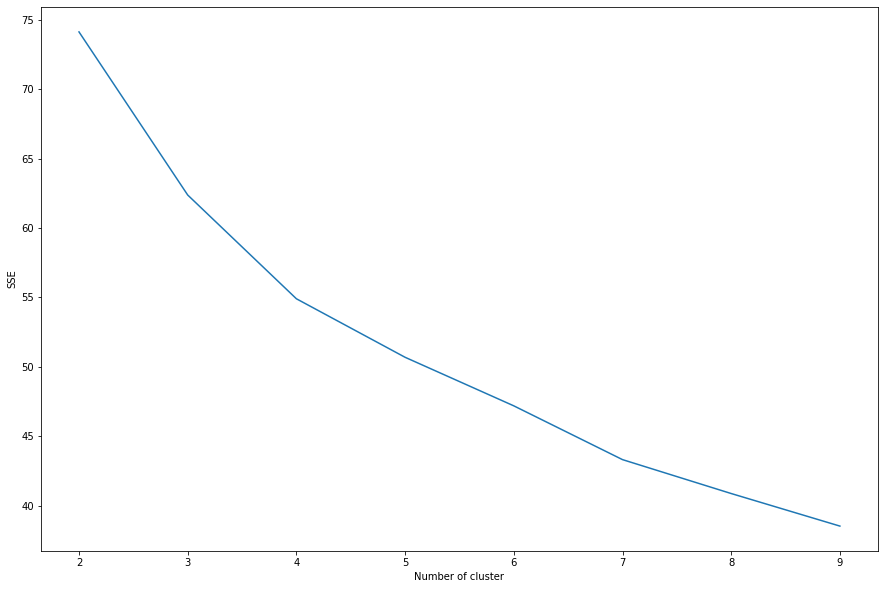

In [57]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

A partir de la curva obtenida podemos ver cómo a medida que se aumenta la cantidad de centroides, el valor de WCSS disminuye de tal forma que la gráfica adopta una forma de codo. Para seleccionar el valor óptimo de k, se escoje entonces ese punto en donde ya no se dejan de producir variaciones importantes del valor de WCSS al aumentar k. En este caso, vemos que esto se produce a partir de k >= 6.

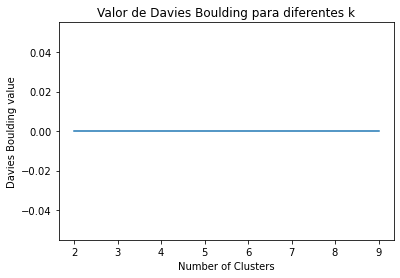

In [22]:
#indice davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

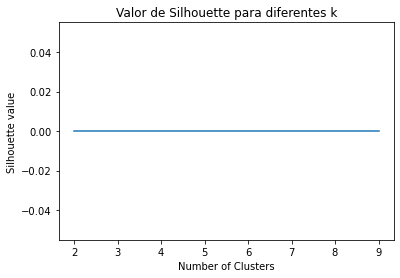

In [23]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.